### Part A

In [71]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [72]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(y_true, y_pred):
    metrics = {}
    metrics["MAE"] = mean_absolute_error(y_true, y_pred)
    metrics["MSE"] = mean_squared_error(y_true, y_pred)
    metrics["RMSE"] = np.sqrt(metrics["MSE"])
    metrics["R2"] = r2_score(y_true, y_pred)
    return metrics


In [74]:
data=pd.read_csv("CE802_P3_Data.csv")

In [75]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,268.50,-7965.33,4,20.28,-122.08,USA,3877.20,10.44,Very low,62.34,...,121.11,-23.16,-10654.95,-327.96,5050.17,1,59.20,-6.58,-61.30,188.82
1,112.44,-4637.76,3,3.82,-217.44,Rest,4195.80,8.61,Low,72.75,...,28.20,-18.98,6115.59,-416.93,3137.28,5,38.40,-3.20,-49.31,-8.93
2,329.64,-4883.24,3,6.10,-543.05,UK,3717.90,21.90,Low,68.85,...,153.54,-21.96,-198.15,-32.38,3902.22,4,42.26,-1.50,-19.30,149.40
3,261.60,-8774.62,3,15.98,-177.57,Europe,3537.64,11.70,Very high,67.26,...,112.45,-20.90,-4018.53,-578.30,5599.65,1,35.98,-1.52,-6.44,243.91
4,434.82,-12715.77,4,15.70,-478.52,Europe,4397.68,22.47,Low,34.56,...,46.31,-18.94,-203.34,-143.84,3682.26,4,52.09,-15.74,-79.37,147.16


In [76]:
# using The pandas profiling pacage to get an genral idea about the data set

profile = ProfileReport(data, title="CE802_P2_Data", html={"style":{"full_width":True}})

In [77]:
#profile.to_notebook_iframe()

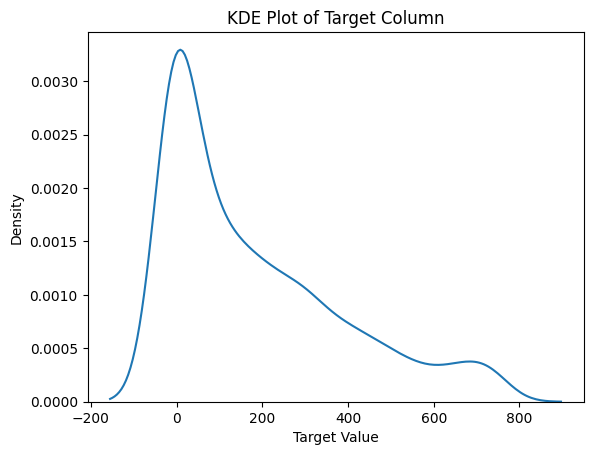

In [78]:
sns.kdeplot(data["Target"])

# Customize the plot (optional)
plt.title("KDE Plot of Target Column")
plt.xlabel("Target Value")
plt.ylabel("Density")

# Display the plot
plt.show()



F25 is highly skewed (γ1 = 23.75157799)	Skewed<br>
F28 has unique values	Unique<br>
F25 has 53 (3.8%) zeros	Zeros<br>
F31 has 22 (1.6%) zeros<br>

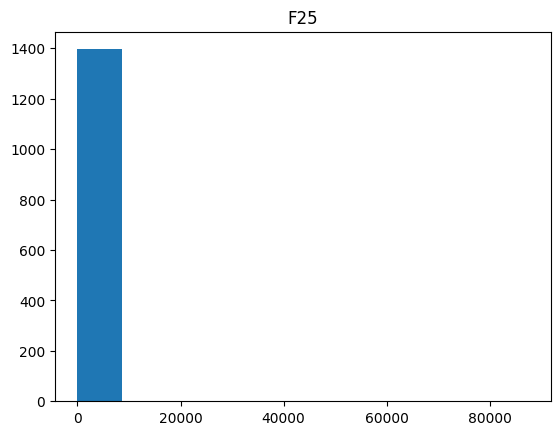

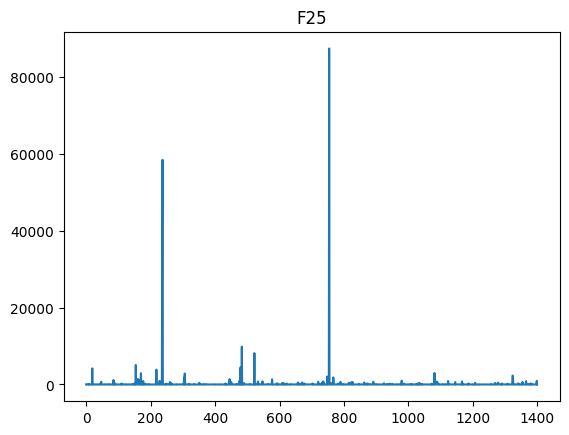

In [79]:
plt.hist(data["F25"])
plt.title("F25")
plt.show()
plt.plot(data["F25"])
plt.title("F25")
plt.show()

In [80]:

# Cap the values in the 'F16' column
data_capped = data.copy()
y_pca=data_capped.pop('Target')
X_pca=data_capped

# Calculate the skewness after capping the outliers
#skewness_capped = data_capped['F25'].skew()
#print(f"Skewness after capping outliers: {skewness_capped}")
le = preprocessing.LabelEncoder()
X_pca['F6']=le.fit_transform(X_pca['F6'])
X_pca['F9']=le.fit_transform(X_pca['F9'])
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
pca = PCA()
pca.fit(X_pca)




PCA()

In [81]:
# Apply PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_pca)

# Transform PCA output to a DataFrame
X_pca = pd.DataFrame(X_pca, columns=["PC" + str(i + 1) for i in range(X_pca.shape[1])])

In [82]:
y_pca

0       188.82
1        -8.93
2       149.40
3       243.91
4       147.16
         ...  
1395     -8.93
1396    552.51
1397    346.05
1398    488.70
1399     -8.93
Name: Target, Length: 1400, dtype: float64

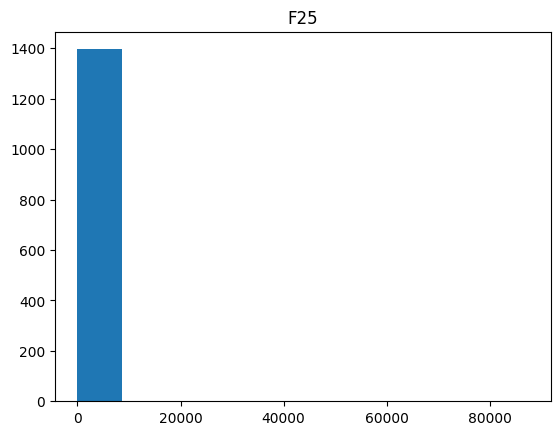

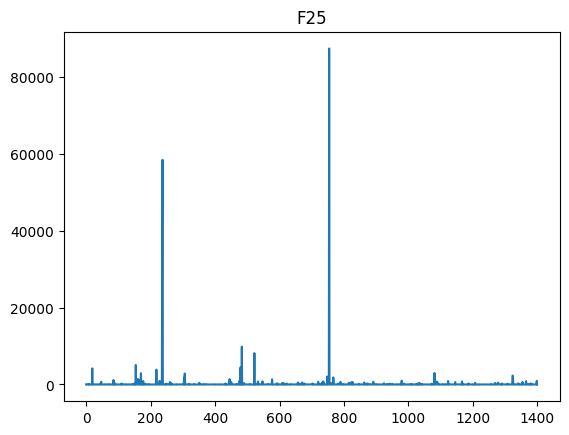

In [83]:
plt.hist(data_capped["F25"])
plt.title("F25")
plt.show()
plt.plot(data_capped["F25"])
plt.title("F25")
plt.show()

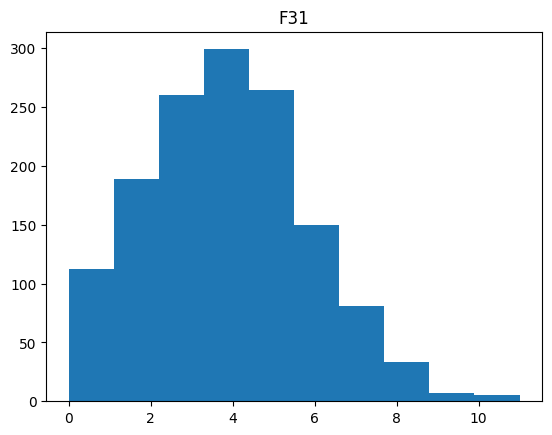

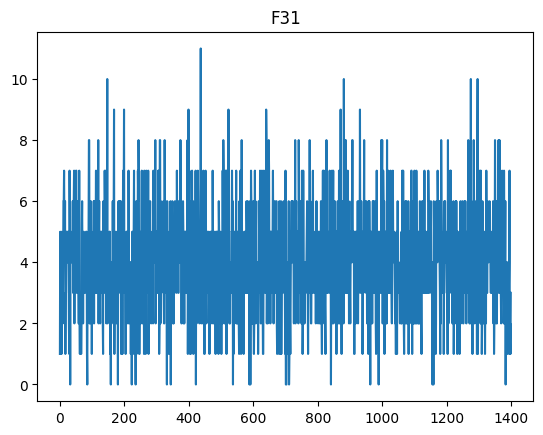

In [84]:
plt.hist(data["F31"])
plt.title("F31")
plt.show()
plt.plot(data["F31"])
plt.title("F31")
plt.show()

In [85]:
#Encoding Categorical data
le = preprocessing.LabelEncoder()
data['F6']=le.fit_transform(data['F6'])
data['F9']=le.fit_transform(data['F9'])


In [86]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,268.50,-7965.33,4,20.28,-122.08,3,3877.20,10.44,4,62.34,...,121.11,-23.16,-10654.95,-327.96,5050.17,1,59.20,-6.58,-61.30,188.82
1,112.44,-4637.76,3,3.82,-217.44,1,4195.80,8.61,1,72.75,...,28.20,-18.98,6115.59,-416.93,3137.28,5,38.40,-3.20,-49.31,-8.93
2,329.64,-4883.24,3,6.10,-543.05,2,3717.90,21.90,1,68.85,...,153.54,-21.96,-198.15,-32.38,3902.22,4,42.26,-1.50,-19.30,149.40
3,261.60,-8774.62,3,15.98,-177.57,0,3537.64,11.70,3,67.26,...,112.45,-20.90,-4018.53,-578.30,5599.65,1,35.98,-1.52,-6.44,243.91
4,434.82,-12715.77,4,15.70,-478.52,0,4397.68,22.47,1,34.56,...,46.31,-18.94,-203.34,-143.84,3682.26,4,52.09,-15.74,-79.37,147.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,633.99,-10795.05,0,6.38,-20.21,2,5052.76,14.79,2,67.59,...,50.77,-21.26,-21603.84,-275.58,4182.42,7,63.77,-4.92,-105.52,-8.93
1396,491.22,-7178.93,4,6.90,-29.70,2,4665.90,11.64,3,58.20,...,154.80,-13.06,-6675.57,-106.85,3800.34,1,21.76,-17.58,-15.12,552.51
1397,194.58,-4566.89,7,6.90,17.64,2,6276.62,-2.34,2,66.27,...,233.74,-11.72,-757.83,-324.35,5959.02,2,27.46,-4.14,-57.91,346.05
1398,331.83,-12134.35,6,5.72,-182.30,1,3204.02,12.03,4,73.38,...,141.42,-9.48,3242.28,-427.70,4672.23,1,63.85,5.30,-53.96,488.70


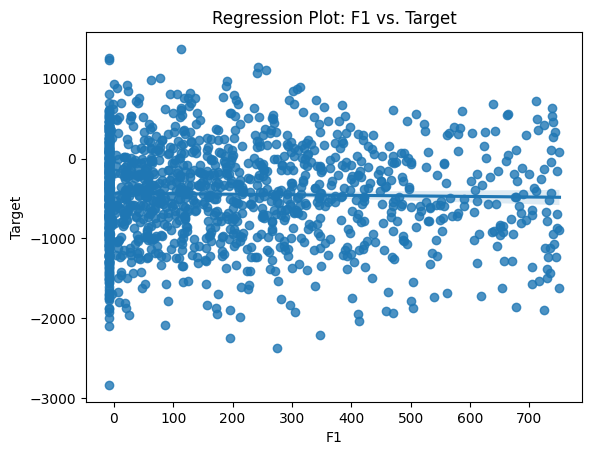

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.regplot(x='Target', y='F22', data=data)

# Set the title and labels for the plot
plt.title('Regression Plot: F1 vs. Target')
plt.xlabel('F1')
plt.ylabel('Target')

# Display the plot
plt.show()


In [88]:
y=data.pop("Target")
X=data

In [89]:
X.shape,y.shape

((1400, 34), (1400,))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

<b><h1>Model 0 Linear Regression 

Baseline(Data Not Changed)

In [91]:
model0=make_pipeline(StandardScaler(),LinearRegression())
score=cross_val_score(model0, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-106.63152812080519

In [92]:
model0.fit(X_train, y_train)
pred=model0.predict(X_test)
model0_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)

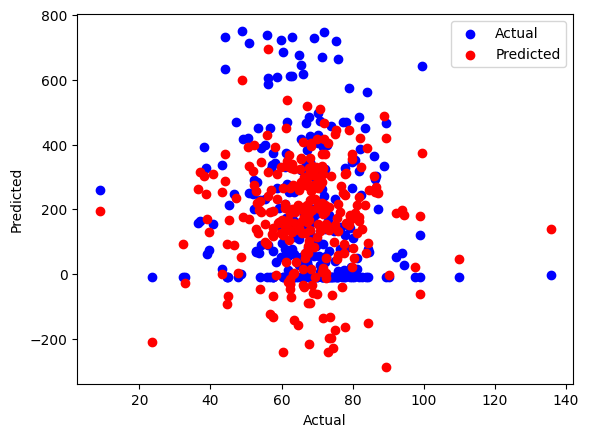

In [93]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model(PCA)

In [94]:
model0=make_pipeline(StandardScaler(),LinearRegression())
score=cross_val_score(model0, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-141.27981158670042

In [95]:
model0.fit(X_train_pca, y_train_pca)
pred=model0.predict(X_test_pca)
model0_main_score=calculate_metrics(y_true=y_test,y_pred=pred)

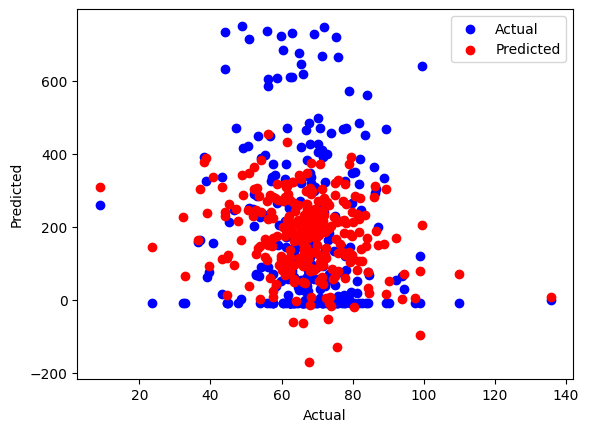

In [96]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


<h3><b>Model 1 Decision Tree Regressor

Baseline

In [97]:
model1=make_pipeline(StandardScaler(),DecisionTreeRegressor())
score=cross_val_score(model0, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-106.63152812080519

In [98]:
model1.fit(X_train, y_train)
pred=model1.predict(X_test)
model1_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)

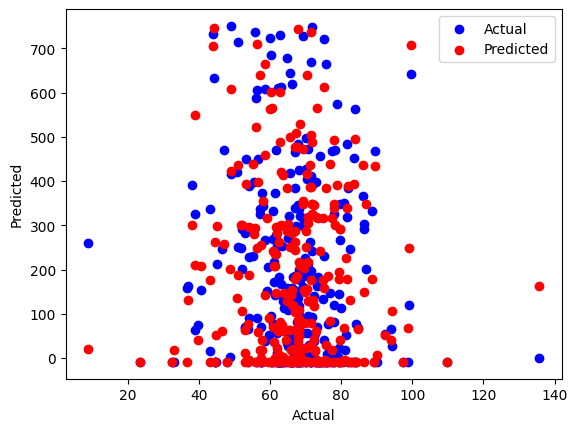

In [99]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model

In [100]:
model1=make_pipeline(StandardScaler(),DecisionTreeRegressor())
score=cross_val_score(model1, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-204.03247321428574

In [101]:
model1.fit(X_train_pca, y_train_pca)
pred=model1.predict(X_test_pca)
model1_main_score=calculate_metrics(y_true=y_test,y_pred=pred)

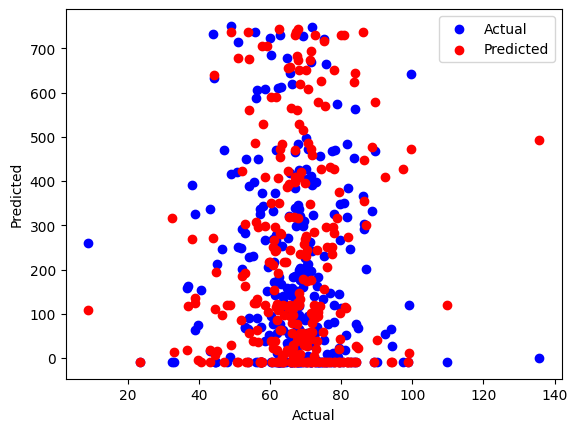

In [102]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


<h1><b>Model 2 RandomForestRegressor

Baseline

In [103]:
model2=make_pipeline(StandardScaler(),RandomForestRegressor())
score=cross_val_score(model2, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-92.19022151785714

In [104]:
model2.fit(X_train, y_train)
pred=model2.predict(X_test)
model2_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)
model2_baseline_score

{'MAE': 86.30413357142857,
 'MSE': 14038.633040747713,
 'RMSE': 118.4847375856811,
 'R2': 0.6756286926211166}

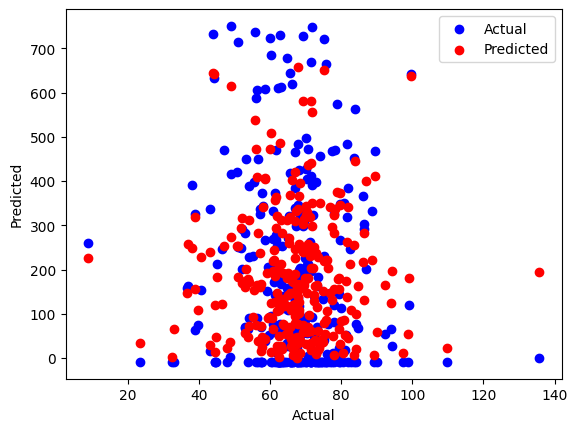

In [105]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model

In [106]:
model2=make_pipeline(StandardScaler(),RandomForestRegressor())
score=cross_val_score(model2, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-153.17612321428572

In [107]:
model2.fit(X_train_pca, y_train_pca)
pred=model2.predict(X_test_pca)
model2_main_score=calculate_metrics(y_true=y_test,y_pred=pred)
model2_main_score

{'MAE': 149.7983675,
 'MSE': 38845.89891866597,
 'RMSE': 197.0936298277191,
 'R2': 0.10244145694369433}

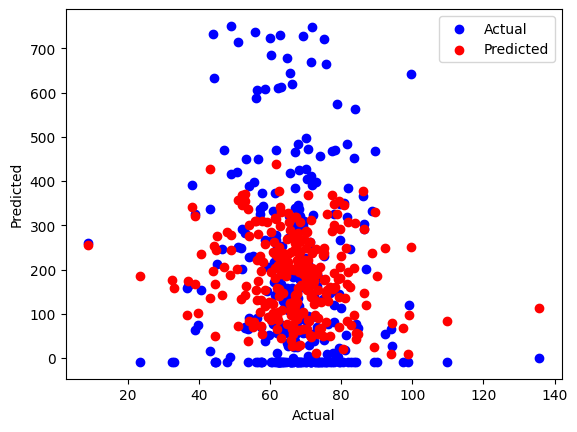

In [108]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


<h3><b>Model 3 Lasso

Baseline

In [109]:
model3=make_pipeline(StandardScaler(),Lasso())
score=cross_val_score(model3, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-106.11105239200188

In [110]:
model3.fit(X_train, y_train)
pred=model3.predict(X_test)
model3_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)
model3_baseline_score

{'MAE': 117.67683764843768,
 'MSE': 22692.254373364052,
 'RMSE': 150.63948477528743,
 'R2': 0.47568141448690215}

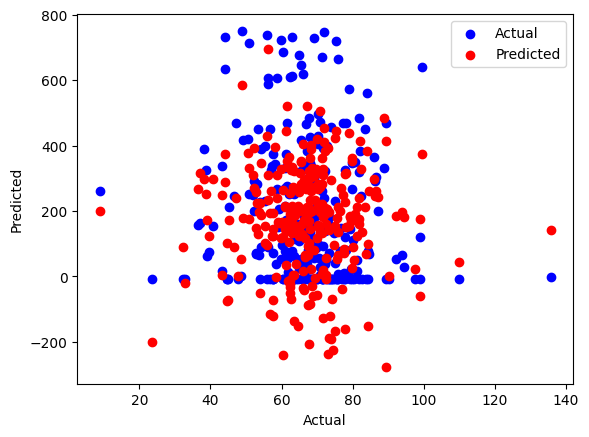

In [111]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model

In [112]:
model3_1=make_pipeline(StandardScaler(),Lasso())
score=cross_val_score(model3_1, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-141.34618284781465

In [113]:
model3_1.fit(X_train_pca, y_train_pca)
pred=model3_1.predict(X_test_pca)
model3_main_score=calculate_metrics(y_true=y_test_pca,y_pred=pred)
model3_main_score

{'MAE': 138.1065173398261,
 'MSE': 34828.880596207324,
 'RMSE': 186.62497313116305,
 'R2': 0.1952571521213382}

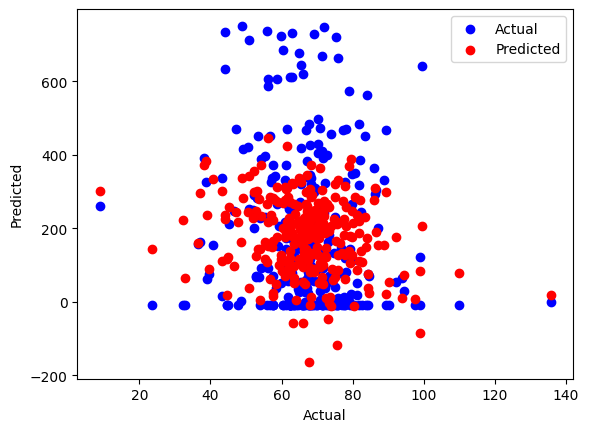

In [114]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


<h3><b>Model 4 Ridge 

Baseline

In [115]:
model4=make_pipeline(StandardScaler(),Ridge ())
score=cross_val_score(model4, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-106.61656586372285

In [116]:
model4.fit(X_train, y_train)
pred=model4.predict(X_test)
model4_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)
model4_baseline_score

{'MAE': 118.36355759869981,
 'MSE': 22915.984017079325,
 'RMSE': 151.38026297070343,
 'R2': 0.47051200256334136}

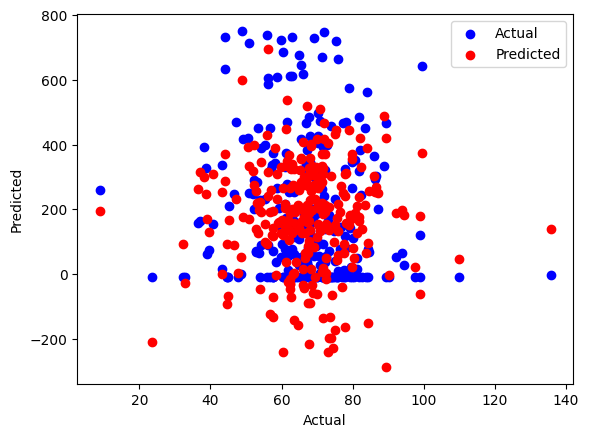

In [117]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model

In [118]:
model4_1=make_pipeline(StandardScaler(),Ridge ())
score=cross_val_score(model4_1, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-141.28320063605665

In [119]:
model4_1.fit(X_train_pca, y_train_pca)
pred=model4_1.predict(X_test_pca)
model4_main_score=calculate_metrics(y_true=y_test_pca,y_pred=pred)
model4_main_score

{'MAE': 137.850593432294,
 'MSE': 34827.86172433922,
 'RMSE': 186.622243380416,
 'R2': 0.19528069378660917}

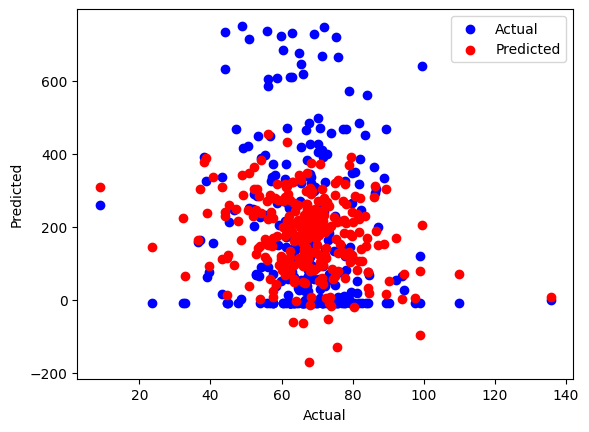

In [120]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


<h3><b>Model 5 GradientBoostingRegressor 

Baseline

In [121]:
model5=make_pipeline(StandardScaler(),GradientBoostingRegressor ())
score=cross_val_score(model5, X_train, y_train, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-65.76979601648668

In [122]:
model5.fit(X_train, y_train)
pred=model5.predict(X_test)
model5_baseline_score=calculate_metrics(y_true=y_test,y_pred=pred)
model5_baseline_score

{'MAE': 68.82454141882405,
 'MSE': 8643.431411932483,
 'RMSE': 92.97005653398563,
 'R2': 0.8002881662915152}

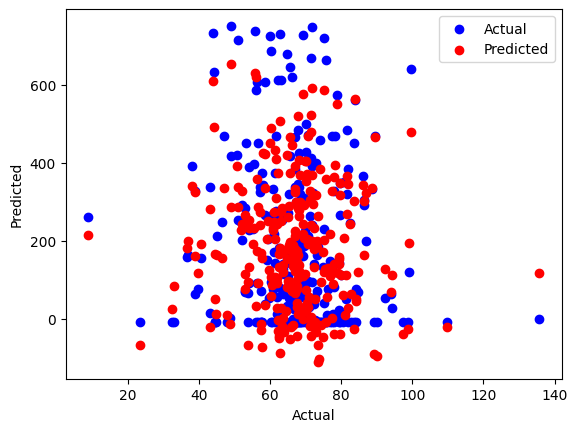

In [123]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Main Model

In [124]:
model5_1=make_pipeline(StandardScaler(),GradientBoostingRegressor())
score=cross_val_score(model5_1, X_train_pca, y_train_pca, cv=10,scoring='neg_mean_absolute_error')
score=np.mean(score)
score

-148.53209129061946

In [125]:
model5_1.fit(X_train_pca, y_train_pca)
pred=model5_1.predict(X_test_pca)
model5_main_score=calculate_metrics(y_true=y_test_pca,y_pred=pred)
model5_main_score

{'MAE': 145.69664704831237,
 'MSE': 38395.25539140523,
 'RMSE': 195.94707293400745,
 'R2': 0.11285385462337694}

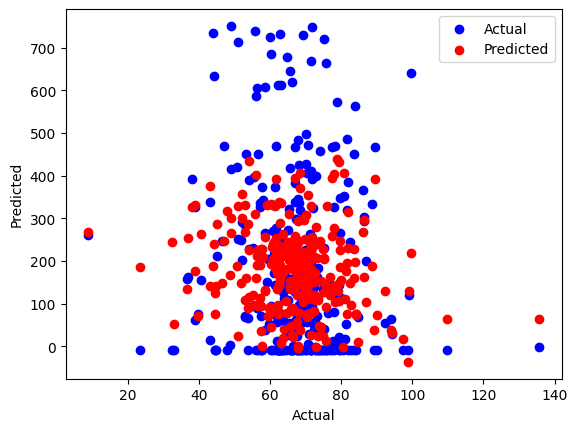

In [126]:
import matplotlib.pyplot as plt

plt.scatter(X_test['F10'], y_test, c='blue', label='Actual')
plt.scatter(X_test['F10'], pred, c='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Comparision

In [127]:
score_baseline={"Linear Regression (Baseline)":model0_baseline_score,"DecisionTreeRegressor(baseline)":model1_baseline_score,"RandomForestRegressor(Basline)":model2_baseline_score,"Lasso(Baseline)":model3_baseline_score,"Ridge(Baseline)":model4_baseline_score,"GradientBoostingRegressor(Baseline)":model5_baseline_score}
score_baseline=pd.DataFrame.from_dict(score_baseline, orient='index')
highlighted_score = score_baseline.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)



,MAE,MSE,RMSE,R2
Linear Regression (Baseline),118.396816,22921.541439,151.398618,0.470384
DecisionTreeRegressor(baseline),114.308857,25754.739327,160.482832,0.404921
RandomForestRegressor(Basline),86.304134,14038.633041,118.484738,0.675629
Lasso(Baseline),117.676838,22692.254373,150.639485,0.475681
Ridge(Baseline),118.363558,22915.984017,151.380263,0.470512
GradientBoostingRegressor(Baseline),68.824541,8643.431412,92.970057,0.800288


In [128]:
score_main={"Linear Regression  Model":model0_main_score,"DecisionTreeRegressor":model1_main_score,"RandomForestRegressor":model2_main_score,"Lasso":model3_main_score,"Ridge":model4_main_score,"GradientBoostingRegressor":model5_main_score}
score_main=pd.DataFrame.from_dict(score_main, orient='index')
highlighted_score = score_main.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)



,MAE,MSE,RMSE,R2
Linear Regression Model,137.845687,34829.638233,186.627003,0.195240
DecisionTreeRegressor,212.369750,82964.975360,288.036413,-0.916957
RandomForestRegressor,149.798368,38845.898919,197.093630,0.102441
Lasso,138.106517,34828.880596,186.624973,0.195257
Ridge,137.850593,34827.861724,186.622243,0.195281
GradientBoostingRegressor,145.696647,38395.255391,195.947073,0.112854


### Part B

In [133]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data['F6'] = le.fit_transform(test_data['F6'])
test_data['F9'] = le.fit_transform(test_data['F9'])
pred=model5.predict(test_data)

predicted = pred # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])